# 1 Import relevant libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# classifier options
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# libraries for evaluating model performance
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn import metrics

Data source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

"Predict behavior to retain telecom customers. We can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month

- the column is called Churn.

- Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
df = pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


- The raw data contains 7043 rows (customers) and 21 columns (features).
  
- The “Churn” column is the target.
  
- Dataset displays customers and services subscribed to by those customers. It will be predicted whether customers will churn or not?

# 2 Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- NO missing value
- There are still data types that are inappropriate, so they need to be converted

In [4]:
# Check Target Variable Distribution --> See data on customers whose churn is Yes and whose churn is No:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

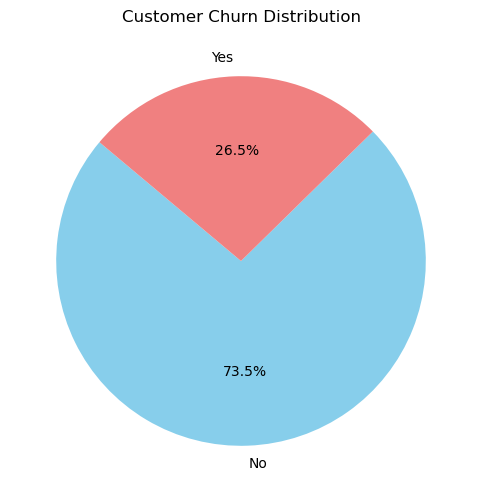

In [5]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

labels = churn_counts.index.tolist()  # Use the index (Yes/No) as labels
sizes = churn_counts.values.tolist()   # Use the counts as sizes

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Customer Churn Distribution')  # Set a relevant title

# Show the chart
plt.show()

- Number of churns for Yes is 1869 and No is 5174 --> the target data is imbalanced between Yes and No.
  
- NOTES:
  - In this case, we have class imbalance with few positives. A low churn rate is generally good for a company. Therefore, to reduce churn for the services provided, the company needs to implement marketing strategies.
    
  - In our business challenges, false negatives are costly. Hence let's keep an eye onto the Precision, Recall & F2 score as well as accuracy, as well as ROC-AUC.

# 3 Exploratory Data Analysis (EDA)

## a. Histogram

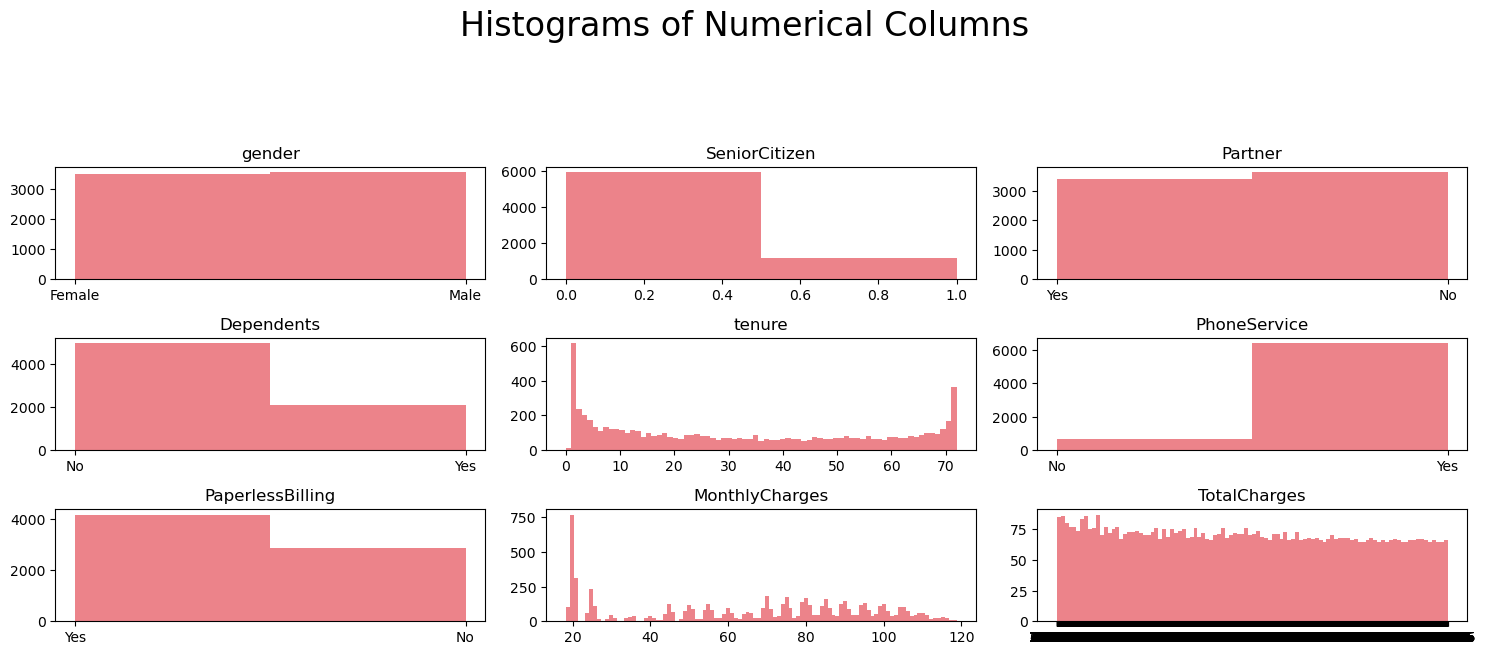

In [6]:
# Plot Histogram of numeric Columns:

df2 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

#Histogram:

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(df2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Key Insights**:

These graphs display histograms of numerical columns from a dataset, likely related to customer data (such as telecom customers). Histograms help visualize the distribution of different features.
- Most customers are not senior citizen (0) and do not have dependant (No) that have phone service (Yes).
  
- Many customers have a very short tenure (close to 0 months) and have low monthly charges (20-30). A smaller peak exists at the maximum tenure (~70 months), likely representing long-term customers. This distribution suggests a significant portion of customers churn early, while a few stay long-term.
  
- TotalCharges and MonthlyCharges show many customers pay lower amounts, but some pay much more.
  
- A higher number of customers use paperless billing (Yes) compared to those who do not.
  
- Possible data issues: The TotalCharges histogram might need fixing due to missing values or incorrect formatting.

## b. Analyze distribution of Key Categorical Variables

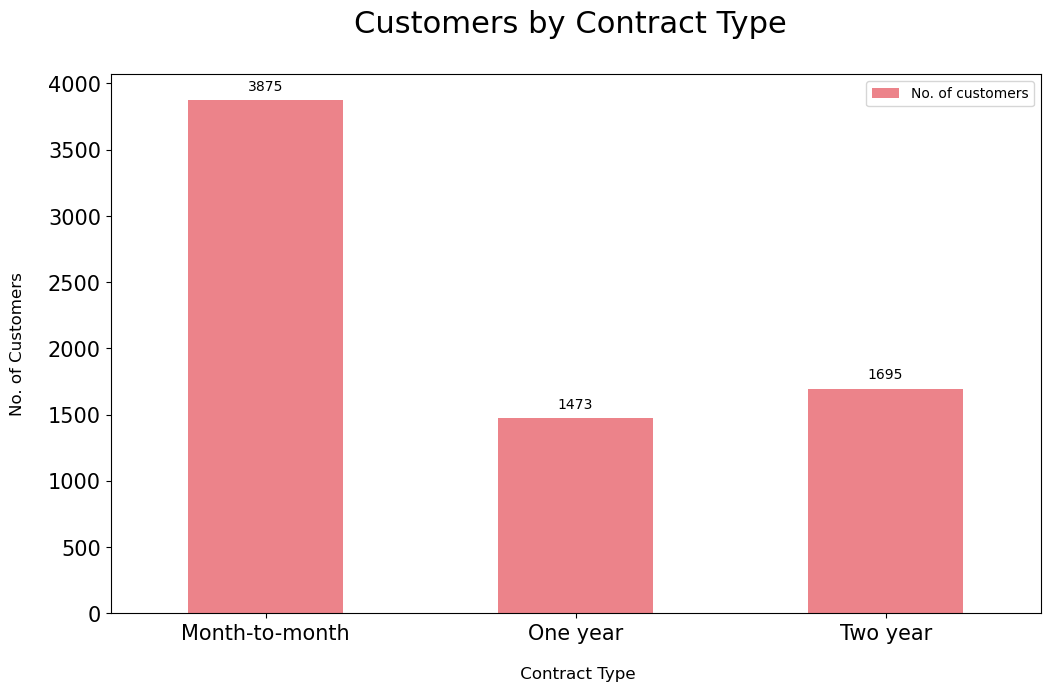

In [7]:
#(1) Distribution of Contract Type

contract_split = df[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

**Key Insights:**
- Most customers (3,875) are on month-to-month contracts.
  
- Fewer customers have long-term contracts (1,473 for one-year, 1,695 for two-year).
  
- Short-term contracts may lead to higher churn, as customers can leave more easily.



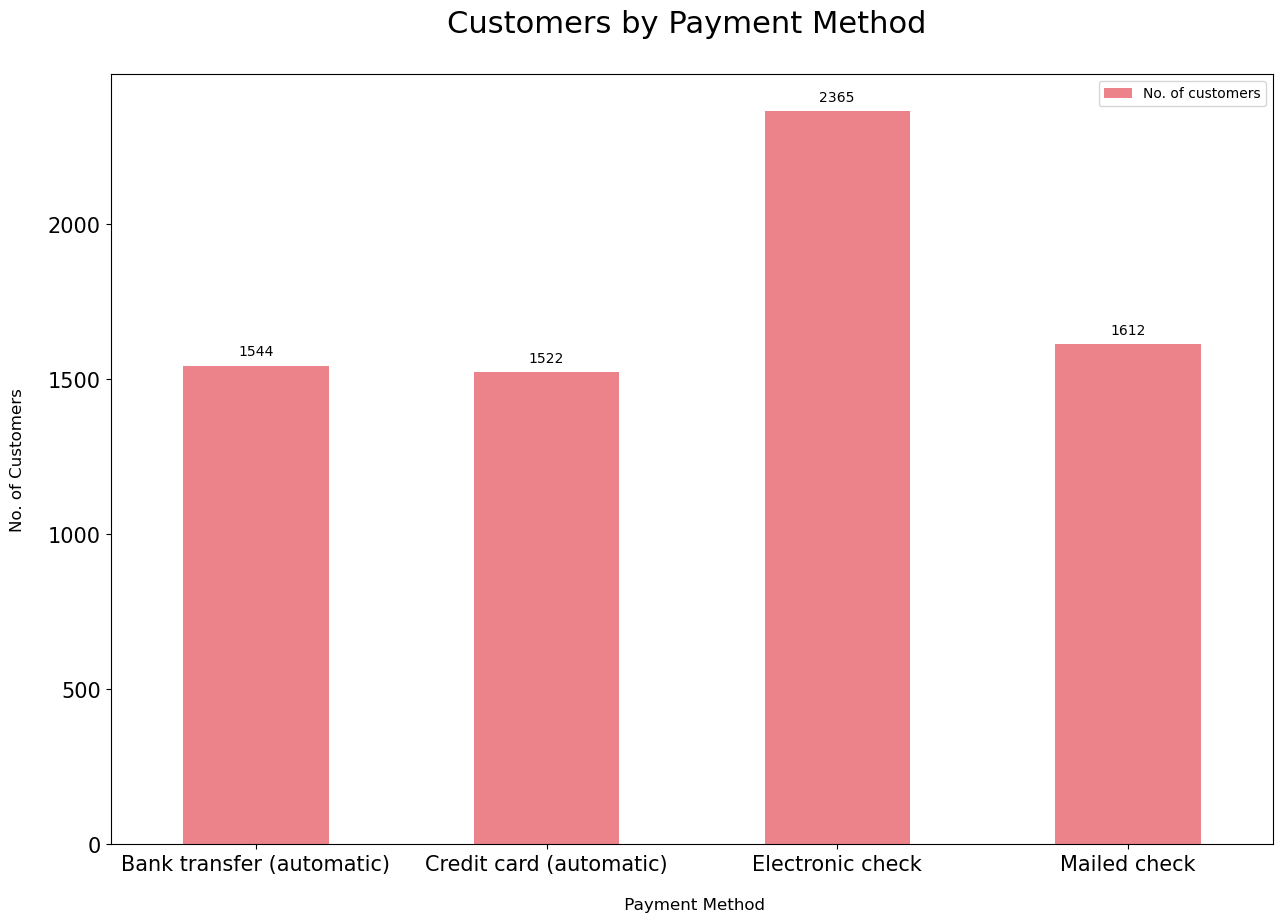

In [8]:
#(2) Distribution of Payment Method Type:
payment_method_split = df[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False,  subplots = False,  figsize =(15, 10), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Payment Method',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split [["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

**Key Insights:**

- Electronic check is the most used payment method (2,365 customers).
  
- Credit card (automatic) is the least used (1,522 customers).
  
- Bank transfer (automatic) and mailed check have similar usage (1,544 and 1,612 customers, respectively).

**Possible Business Implications:**
- Since electronic check is the most used, companies should analyze if it is linked to higher churn rates or billing issues.
  
- Encouraging automatic payments (credit card/bank transfer) may improve retention and reduce late payments.



## c. Analyze the churn type based on contract type

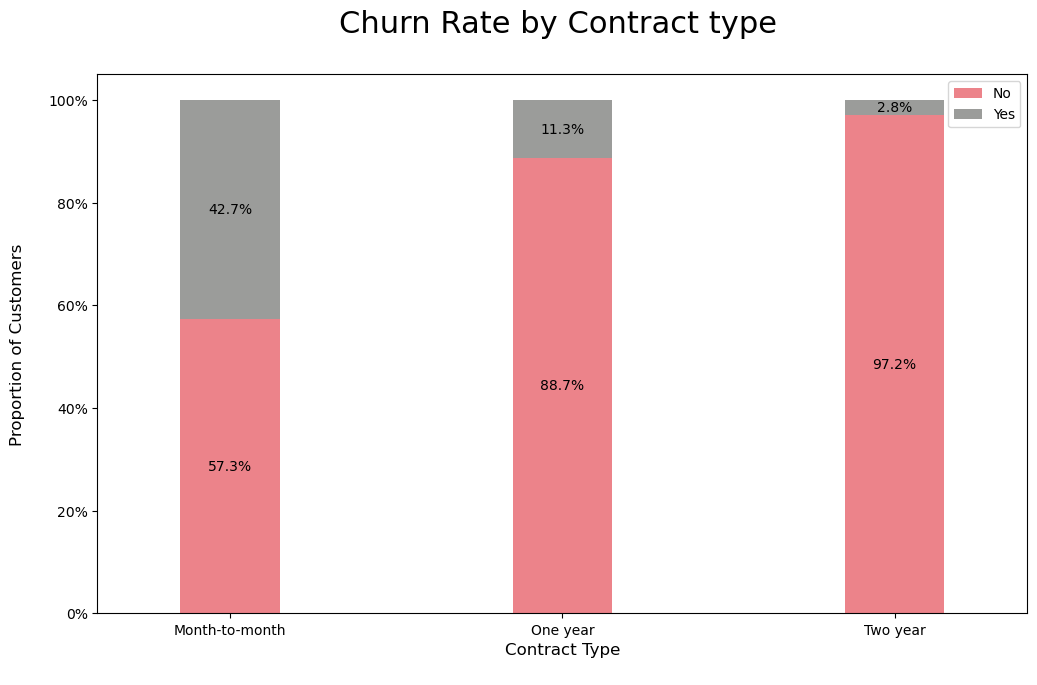

In [9]:
# Distribution of churn type by contract type

import matplotlib.ticker as mtick

contract_churn = df.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)


**Key Insights:**
- The longer the contract duration, the lower the churn rate.
  
- Customers on month-to-month contracts have the highest churn rate, likely because they have more flexibility to switch services.
  
- Customers with one-year or two-year contracts are more loyal, possibly due to incentives or penalties for early termination.

**Business Implications:**
- The company should focus on retaining month-to-month customers by offering incentives (discounts, bundles. etc) to switch to long-term contracts.
  
- Long-term contracts help with customer retention, so promotions or discounts for annual plans could reduce churn.
  
- Implement targeted retention strategies for month-to-month customers.
  
- Analyze competitor strategies to identify market gaps and opportunities.


## d. Analyze churn rate based on payment method

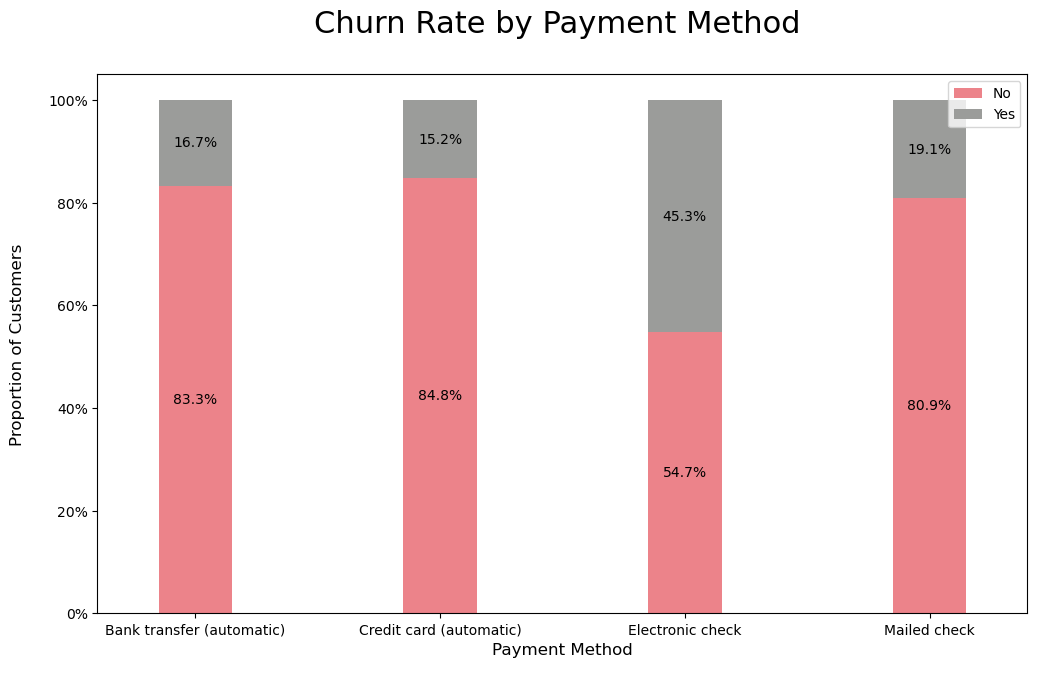

In [10]:
# Distribution of churn rate by payment method

import matplotlib.ticker as mtick

contract_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Payment Method\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)


Customers who are likely to churn are those who subscribe monthly with manual payments (electronic checks)

**Key Insights:**
- Customers using electronic checks churn the most (45.3%), meaning they leave the service more often.
  
- Customers with automatic payments (bank transfer & credit card) churn the least (15-16%), meaning they stay longer.
  
- Mailed check users have moderate churn (19.1%), but still lower than electronic check users.

**Business Implications:**
- Encourage Automatic Payments, such as offering discounts or easy setup for bank transfers & credit cards.
  
- Reduce Electronic Check Churn such as send reminders, offer better payment options, or give incentives to switch.
  
- Improve target high-churn customers experience with promotions & flexible payment options.
  
- Focus on Loyal Customers, for example, providing reward automatic payment users to keep them engaged.

# 4 Data Cleaning and Preprocessing

## a. Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- No missing value
  
- However, data type for TotalCharge is not appropriate --> need to be changed.

In [12]:
# Check the unique value of TotalCharge (categorical data):
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce') # 'force' convert from string to numeric, if an error occurs during conversion, it will be replaced with NaN

In [14]:
# Check the result:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Data type for TotalCharges has been converted from object to numeric.
  
- However, there are 11 missing values (11 customers)

In [15]:
# Check the columns that have missing values
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
# Imputation (filling null values) of the TotalCharges column with the value 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [17]:
# Check the result:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- All data is complete, there are no missing values
  
- However, there are still many columns with categorical data types, so they need to be label-encoded, but only for columns that have two possible values.

## b. Label Encoding Binary data

In [18]:
# Copy the dataframe
df_tmp = df.copy()

In [19]:
# Check all columns:
df_tmp.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
encoders = {}         # create encoder object storage for encoded columns

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_tmp.columns[1:]:
    if df_tmp[col].dtype == 'object':
        if len(list(df_tmp[col].unique())) <= 2:
            print(col)
            le = LabelEncoder()
            le.fit(df_tmp[col])
            df_tmp[col] = le.transform(df_tmp[col])   # update the column with the results of the transformation
            encoders[col] = le
            le_count += 1

print('{} columns were label encoded.'.format(le_count))


gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn
6 columns were label encoded.


**Compare the result of label encoding**

In [21]:
# The original data:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
# Data after doing label encoding:
df_tmp

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


- Each unique category in a column is assigned a numerical value. For example, in 'gender' column with values ["Male", "Female"], label encoding could convert them to [0, 1]
  
- It is commonly used when a categorical feature has only two unique values (binary categories).

## c. One-Hot Encoding for the Remaining Categorical Variables

In [23]:
# Remove the customerID column as it is not significant in the prediction:
identity = df_tmp["customerID"]

df_tmp = df_tmp.drop(columns="customerID")


In [24]:
# One-Hot Encoding for remaining categorical variables:
df_tmp= pd.get_dummies(df_tmp)
df_tmp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,False,False,True,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,True,False,False,True,False,False,False,False,False,True


In [25]:
# Original data:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Features such as "StreamingMovies," "Contract," or "PaymentMethod" have already been one-hot encoded, where different categories are represented as separated columns. For example, "Contract" column with values: Month-to-month, One year, and Two year has been converted into three separate columns: Contract_Month-to-month, Contract_One year, Contract_Two year

In [26]:
# Add the CustomerID column:
df_tmp = pd.concat([df_tmp, identity], axis = 1)

In [27]:
# Save the one-hot encoding result for later use
one_hot_columns = df_tmp.columns

## d. Split Dataset into Dependent (Targets) and Independent Variables (Features/Predictors)

In [28]:
# Identify target variable:
target = df_tmp["Churn"]
df_tmp = df_tmp.drop(columns="Churn")

## e. Generate training and test datasets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_tmp, target,
                                                    stratify=target, # to balance the ratio of values ​​in the training and test data
                                                    test_size = 0.2,
                                                    random_state = 0)

In [30]:
print("Dimensi X_train dataset: ", X_train.shape)
print("Dimensi y_train dataset: ", y_train.shape)
print("Dimensi X_test dataset: ", X_test.shape)
print("Dimensi y_test dataset: ", y_test.shape)

Dimensi X_train dataset:  (5634, 41)
Dimensi y_train dataset:  (5634,)
Dimensi X_test dataset:  (1409, 41)
Dimensi y_test dataset:  (1409,)


## f. Removing Identifiers column

In [31]:
# Removing Identifiers:
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

## g. Feature Scaling

In [32]:
# Original X train:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,1,0,0,1,41,1,0,70.20,2894.55,True,...,True,False,False,False,True,False,False,False,False,True
5807,1,0,0,0,57,1,0,18.80,1094.35,True,...,False,True,False,False,False,True,False,True,False,False
5118,0,0,1,0,42,1,1,85.90,3729.75,False,...,True,False,False,True,False,False,False,True,False,False
275,1,0,1,0,5,1,1,85.40,401.10,False,...,True,False,False,True,False,False,False,False,True,False
1350,0,0,1,0,67,1,0,65.65,4322.85,False,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.20,False,...,True,False,False,False,True,False,False,False,True,False
1954,1,0,0,0,1,1,1,75.45,75.45,False,...,True,False,False,True,False,False,False,False,True,False
525,1,0,0,0,52,1,0,91.25,4738.30,True,...,True,False,False,False,True,False,False,False,True,False
5748,0,0,0,0,21,1,1,99.85,1992.55,False,...,False,False,True,True,False,False,False,True,False,False


In [33]:
# Feature Scaling:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [34]:
# X train after scaling:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,0.996103,-0.444067,-0.961343,1.545268,0.363266,0.327252,-1.203537,0.193982,0.285152,1.030277,...,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,-0.707107,1.825882
5807,0.996103,-0.444067,-0.961343,-0.647137,1.016103,0.327252,-1.203537,-1.515002,-0.512822,1.030277,...,-0.808189,1.887311,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,1.884380,-0.707107,-0.547680
5118,-1.003913,-0.444067,1.040211,-0.647137,0.404069,0.327252,0.830884,0.715987,0.655370,-0.970613,...,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-0.707107,-0.547680
275,0.996103,-0.444067,1.040211,-0.647137,-1.105616,0.327252,0.830884,0.699362,-0.820119,-0.970613,...,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1350,-1.003913,-0.444067,1.040211,-0.647137,1.424126,0.327252,-1.203537,0.042700,0.918274,-0.970613,...,1.237335,-0.529854,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,-0.530678,-0.707107,1.825882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,-1.003913,-0.444067,-0.961343,-0.647137,-0.126361,0.327252,0.830884,-0.303086,-0.279729,-0.970613,...,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1954,0.996103,-0.444067,-0.961343,-0.647137,-1.268825,0.327252,0.830884,0.368538,-0.964469,-0.970613,...,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
525,0.996103,-0.444067,-0.961343,-0.647137,0.812091,0.327252,-1.203537,0.893867,1.102430,1.030277,...,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
5748,-1.003913,-0.444067,-0.961343,-0.647137,-0.452779,0.327252,0.830884,1.179806,-0.114677,-0.970613,...,-0.808189,-0.529854,1.262034,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-0.707107,-0.547680


# 4 Modeling

## a. Model Selection

In [35]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

### **Model Evaluation with Cross-Validation**

In [36]:
# Evaluating Model Results: compared 3 models with 10 times cross validation

acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring   # evaluation matrix: accuracy, roc_a
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),   # calculate the average
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.35,1.64,74.44,1.20
2,Random Forest,82.41,2.08,79.07,1.20
1,Decision Tree Classifier,66.30,1.96,73.45,1.59


- An initial evaluation of multiple algorithms is performed using 10-fold cross-validation to avoid overfitting, since cross-validation trains and evaluates the model on different subsets of the training data.
  
- The mean and standard deviation of ROC AUC and accuracy are calculated for each model where the Models with a high Mean ROC AUC (Logistic regression and random forest) are prioritized for further testing.

### **Evaluating Selected Models on Test Set**

In [37]:
# Evaluating selected models on test set - Second Iteration:

# Logistic Regression-----------------

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])



# Random Forest-----------------------

# Fitting Random Forest to the Training set:

classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = pd.concat([results,model_results], ignore_index = True)

In [38]:
# show the results:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)


print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
0  Logistic Regression  0.800568   0.645768  0.550802  0.594517  0.567493   
1        Random Forest  0.787083   0.635036  0.465241  0.537037  0.491525   

    ROC-AUC  
0  0.720812  
1  0.684311  


- Accuracy measures the overall correctness of the model. Logistic Regression performs slightly better, correctly predicting 80.06% of cases compared to 78.71% for Random Forest.
  
- Precision is the proportion of true positives out of all predicted positives. Higher precision means fewer false positives. Logistic Regression has a slightly higher precision, meaning it is better at avoiding false positives than Random Forest.
  
- Recall measures how many actual positive cases were correctly identified by the model. Higher recall means fewer false negatives. Logistic Regression performs better in recall, meaning it is better at capturing actual positive cases than Random Forest.
  
- F1 Score is a balance between Precision and Recall. A higher F1 Score indicates a better trade-off between precision and recall. Logistic Regression has a higher F1 score, meaning it performs better at balancing precision and recall.
  
- F2 Score is similar to F1 Score but places more emphasis on Recall. Logistic Regression is better at capturing positive cases (i.e., it prioritizes minimizing false negatives more effectively than Random Forest).
  
- ROC-AUC measures the model's ability to distinguish between positive and negative classes. Logistic Regression performs better at distinguishing between classes, meaning it has a stronger ability to separate positive and negative outcomes.
  
- Logistic Regression is the better model overall for this problem based on the evaluation metrics.


## b. Train & Evaluate the Chosen Model

In [39]:
# Fit Logistic Regression on the Training dataset:

classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)


# Predict the Test set results
y_pred = classifier.predict(X_test)

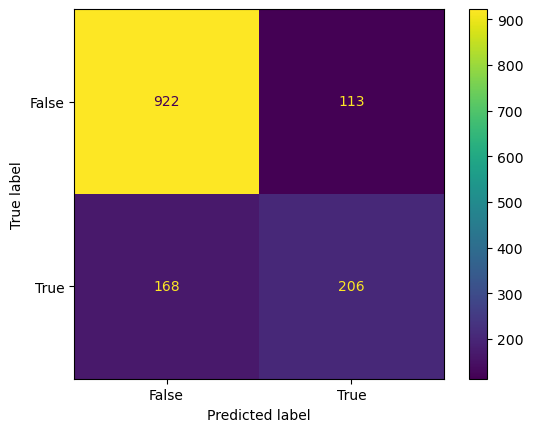

In [40]:
# Evaluation of the selected model using a confusion matrix:
cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()


**Key Insights**
This confusion matrix shows how well the churn prediction model performs in classifying customers who will leave (churn) or stay.
- True Negatives (TN) = 922 → Customers correctly predicted as not churning. No action needed.
  
- True Positives (TP) = 206 → Customers correctly predicted as churning. Can be offered promotions to stay.
  
- False Negatives (FN) = 168 → Customers who churned but were predicted to stay. (Big problem – lost revenue)
  
- False Positives (FP) = 113 → Customers predicted to churn but actually stayed. (Wastes retention efforts & discounts)

**Business Implication*:

1. Customer Loss (False Negatives – 168 customers left undetected)
   
- It is hoped that the value will be as small as possible because it could be a big problem for the company (leading to lost revenue)
  
- Impact: High customer acquisition costs since replacing lost customers is expensive.
  
- Solution: Improve recall to identify more churners and prevent losses.
  
2. Unnecessary Retention Efforts (False Positives = 113 )
   
- The company wasted resources offering discounts to customers who would not have left.
  
- Impact: Reduced profit margins due to unnecessary incentives.
  
- Solution: Improve precision to target only real churners and reduce wasted retention costs.

In [41]:
# Evaluate the Selected Model on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC AUC '])

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
0  Logistic Regression  0.800568   0.645768  0.550802  0.594517  0.567493   

   ROC AUC   
0  0.720812  


**Strengths:**
- 80.1% accuracy means most predictions are correct.
  
- Decent ROC AUC (72.2%) suggests a good ability to distinguish churners.

**Weaknesses & Risks:**
- Recall (55.3%) is low, meaning many churners are not detected → risk of lost customers and revenue.
  
- Moderate precision (64.7%) means retention efforts may be wasted on customers who were not actually going to churn.

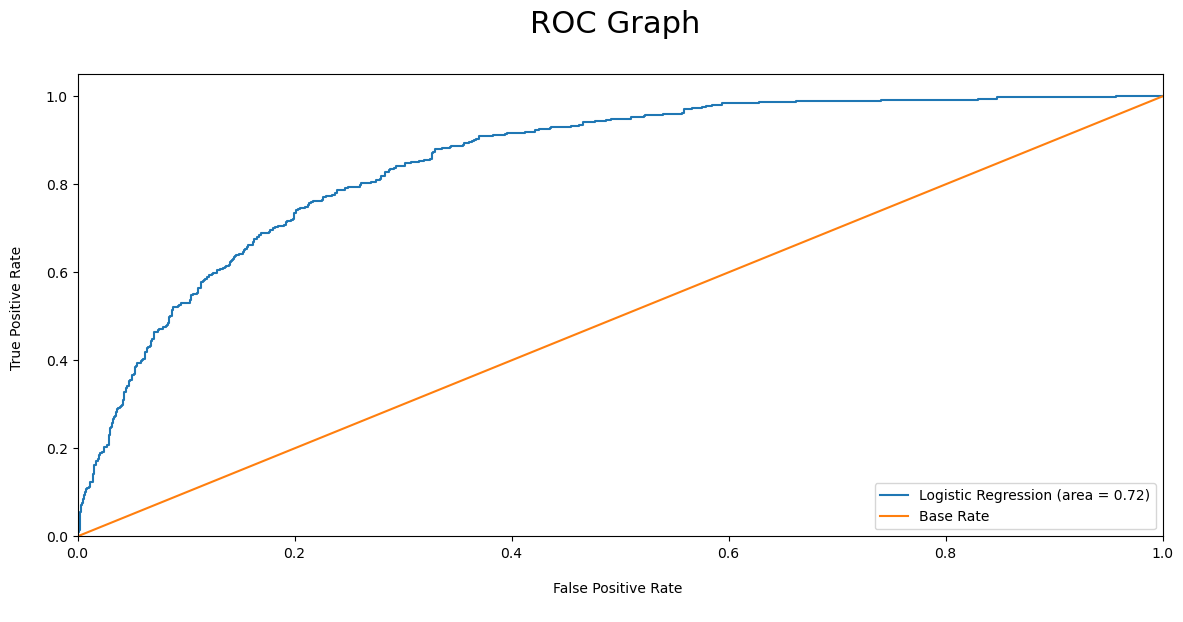

In [42]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = roc_auc_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

# 5 Predicting New Data with Logistic Regression Model

With the Logistic Regression model we obtained above, provide an example of applying the model to predict **a single row** of new customer data. Given values for each of the original variables, use the model to predict whether the customer will churn or not.

## a. Given new data

In [43]:
new_data = {'customerID': ['7370-BOUSA'],
            'gender': ['Female'],
            'SeniorCitizen': [1],
            'Partner': ['Yes'],
            'Dependents': ['Yes'],
            'tenure': [15],
            'PhoneService': ['No'],
            'MultipleLines': ['No phone service'],
            'InternetService': ['DSL'],
            'OnlineSecurity': ['No'],
            'OnlineBackup': ['Yes'],
            'DeviceProtection': ['No'],
            'TechSupport': ['Yes'],
            'StreamingTV': ['Yes'],
            'StreamingMovies': ['Yes'],
            'Contract': ['Month-to-month'],
            'PaperlessBilling': ['Yes'],
            'PaymentMethod': ['Bank transfer (automatic)'],
            'MonthlyCharges': [40.75],
            'TotalCharges': [611.25]
            }

## b. Train the selected model

In [44]:
# The model selected according to the modeling results is:

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

## c. Understanding new data

In [45]:
# New data to be predicted is created in the form of a dataframe first:
df_new_data = pd.DataFrame(new_data)
df_new_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7370-BOUSA,Female,1,Yes,Yes,15,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),40.75,611.25


In [46]:
#check the number of columns and their data types:
df_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1 non-null      object 
 1   gender            1 non-null      object 
 2   SeniorCitizen     1 non-null      int64  
 3   Partner           1 non-null      object 
 4   Dependents        1 non-null      object 
 5   tenure            1 non-null      int64  
 6   PhoneService      1 non-null      object 
 7   MultipleLines     1 non-null      object 
 8   InternetService   1 non-null      object 
 9   OnlineSecurity    1 non-null      object 
 10  OnlineBackup      1 non-null      object 
 11  DeviceProtection  1 non-null      object 
 12  TechSupport       1 non-null      object 
 13  StreamingTV       1 non-null      object 
 14  StreamingMovies   1 non-null      object 
 15  Contract          1 non-null      object 
 16  PaperlessBilling  1 non-null      object 
 17  P

## d. Label Encoding

In [47]:
# Copy the new data first:
df_pred = df_new_data.copy()

In [48]:
# Label encoding for the categorical columns on new data:

encoders = {}  # create encoder object storage for encoded columns


# List of columns to label encode
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

le_count = 0
for col in columns_to_encode:
    if df_pred[col].dtype == 'object':
        if len(list(df_pred[col].unique())) <= 2:
            print(col)
            le = LabelEncoder()
            le.fit(df_pred[col])
            df_pred[col] = le.transform(df_pred[col])  # Update column with transformed values
            encoders[col] = le
            le_count += 1

print('{} columns were label encoded.'.format(le_count))

gender
Partner
Dependents
PhoneService
PaperlessBilling
5 columns were label encoded.


In [49]:
# Check whether the columns have changed their data type:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1 non-null      object 
 1   gender            1 non-null      int64  
 2   SeniorCitizen     1 non-null      int64  
 3   Partner           1 non-null      int64  
 4   Dependents        1 non-null      int64  
 5   tenure            1 non-null      int64  
 6   PhoneService      1 non-null      int64  
 7   MultipleLines     1 non-null      object 
 8   InternetService   1 non-null      object 
 9   OnlineSecurity    1 non-null      object 
 10  OnlineBackup      1 non-null      object 
 11  DeviceProtection  1 non-null      object 
 12  TechSupport       1 non-null      object 
 13  StreamingTV       1 non-null      object 
 14  StreamingMovies   1 non-null      object 
 15  Contract          1 non-null      object 
 16  PaperlessBilling  1 non-null      int64  
 17  P

## e. One-Hot Encoding

In [50]:
# Remove customerID column as it is not significant in prediction (before one-hot encoding):
identity = df_pred["customerID"]

df_pred = df_pred.drop(columns="customerID")

In [51]:
# Check the result:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1 non-null      int64  
 1   SeniorCitizen     1 non-null      int64  
 2   Partner           1 non-null      int64  
 3   Dependents        1 non-null      int64  
 4   tenure            1 non-null      int64  
 5   PhoneService      1 non-null      int64  
 6   MultipleLines     1 non-null      object 
 7   InternetService   1 non-null      object 
 8   OnlineSecurity    1 non-null      object 
 9   OnlineBackup      1 non-null      object 
 10  DeviceProtection  1 non-null      object 
 11  TechSupport       1 non-null      object 
 12  StreamingTV       1 non-null      object 
 13  StreamingMovies   1 non-null      object 
 14  Contract          1 non-null      object 
 15  PaperlessBilling  1 non-null      int64  
 16  PaymentMethod     1 non-null      object 
 17  M

CustomerID column has been deleted

In [52]:
# One-hot encoding for remaining categorical variables:
df_pred= pd.get_dummies(df_pred)
df_pred

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,InternetService_DSL,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_No,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,PaymentMethod_Bank transfer (automatic)
0,0,1,0,0,15,0,0,40.75,611.25,True,True,True,True,True,True,True,True,True,True


In [53]:
# Adding missing columns to new data:
for kolom in one_hot_columns:
    if kolom not in df_pred.columns:
        df_pred[kolom] = 0

In [54]:
# Check whether the data type has changed to numeric or not:
df_pred.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1 non-null      int64  
 1   SeniorCitizen                            1 non-null      int64  
 2   Partner                                  1 non-null      int64  
 3   Dependents                               1 non-null      int64  
 4   tenure                                   1 non-null      int64  
 5   PhoneService                             1 non-null      int64  
 6   PaperlessBilling                         1 non-null      int64  
 7   MonthlyCharges                           1 non-null      float64
 8   TotalCharges                             1 non-null      float64
 9   MultipleLines_No phone service           1 non-null      bool   
 10  InternetService_DSL                      1 non-null   

## f. Scaling

In [55]:
# Delete customerID column (before scaling process):
identity = df_pred["customerID"]

df_pred = df_pred.drop(columns="customerID")

In [56]:
# Delete the Churn column to be predicted (churn column is not included in scaling):
churn_pred = df_pred["Churn"]

df_pred = df_pred.drop(columns="Churn")

In [57]:
# Check the number of columns to see if it matches the dataframe columns in the training process:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1 non-null      int64  
 1   SeniorCitizen                            1 non-null      int64  
 2   Partner                                  1 non-null      int64  
 3   Dependents                               1 non-null      int64  
 4   tenure                                   1 non-null      int64  
 5   PhoneService                             1 non-null      int64  
 6   PaperlessBilling                         1 non-null      int64  
 7   MonthlyCharges                           1 non-null      float64
 8   TotalCharges                             1 non-null      float64
 9   MultipleLines_No phone service           1 non-null      bool   
 10  InternetService_DSL                      1 non-null   

In [58]:
# Scaling:

df_pred_sc = sc_X.fit_transform(df_pred.loc[0].values.reshape(1,-1))

In [59]:
df_pred_sc

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

## g. Predict new customer data

In [60]:
# Predict for customers on new data:
model = LogisticRegression(random_state=0)

y_pred = np.expm1(classifier.predict(df_pred_sc))
print(f"Prediction Result: {y_pred[0]}")

Prediction Result: 0.0


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
# Re-merge Customer ID column:
df_pred = pd.concat([df_pred, identity], axis = 1)

In [62]:
# Add predicted churn column:
new_data['Churn'] = [y_pred[0]]
new_data

{'customerID': ['7370-BOUSA'],
 'gender': ['Female'],
 'SeniorCitizen': [1],
 'Partner': ['Yes'],
 'Dependents': ['Yes'],
 'tenure': [15],
 'PhoneService': ['No'],
 'MultipleLines': ['No phone service'],
 'InternetService': ['DSL'],
 'OnlineSecurity': ['No'],
 'OnlineBackup': ['Yes'],
 'DeviceProtection': ['No'],
 'TechSupport': ['Yes'],
 'StreamingTV': ['Yes'],
 'StreamingMovies': ['Yes'],
 'Contract': ['Month-to-month'],
 'PaperlessBilling': ['Yes'],
 'PaymentMethod': ['Bank transfer (automatic)'],
 'MonthlyCharges': [40.75],
 'TotalCharges': [611.25],
 'Churn': [0.0]}

In [63]:
# Show new customer prediction frame data:

pd.DataFrame(new_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7370-BOUSA,Female,1,Yes,Yes,15,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),40.75,611.25,0.0


**The Logical Regression model predicts that new customers are in class 0, which means the customer will not churn (continue to use the service)**